In [50]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x = df.drop(columns='Outcome', axis=1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=17)
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)
y_test.shape

(231,)

In [52]:
class LogReg:
    def __init__(self, learning_rate=0.01, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.sigmoid_inputs = []
        self.sigmoid_outputs = []
        self.losses = []
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            current_loss = -np.mean(y * np.log(y_predicted + 1e-15) + (1 - y) * np.log(1 - y_predicted + 1e-15))
            self.losses.append(current_loss)

            self.sigmoid_inputs.extend(linear_model)
            self.sigmoid_outputs.extend(y_predicted)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def accuracy(self, y_true, y_pred):
        crrct=(y_true==y_pred)
        return np.mean(crrct) 

        



In [53]:
model4=LogReg(learning_rate=0.01, n_iters=1500)
model4.fit(x_train_scaled, y_train)
predicted = model4.predict(x_test_scaled)
y_test.shape

(231,)

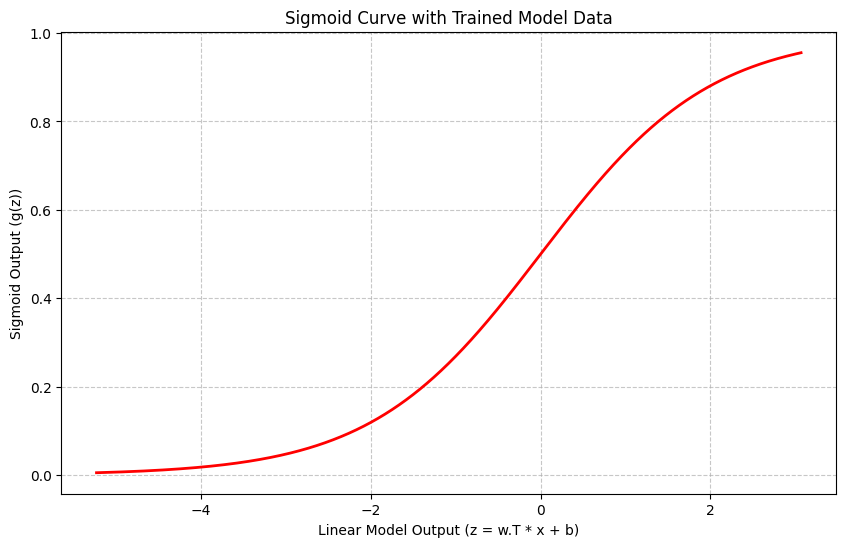

In [82]:
sorted_indices = np.argsort(model4.sigmoid_inputs)
sorted_inputs = np.array(model4.sigmoid_inputs)[sorted_indices]
sorted_outputs = np.array(model4.sigmoid_outputs)[sorted_indices]
plt.figure(figsize=(10, 6))
plt.plot(sorted_inputs, sorted_outputs, color='red', linewidth=2)
plt.title('Sigmoid Curve with Trained Model Data')
plt.xlabel('Linear Model Output (z = w.T * x + b)')
plt.ylabel('Sigmoid Output (g(z))')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

--- Confusion Matrix Details ---
True Positives (TP): 46 -> Correctly predicted diabetes
True Negatives (TN): 135 -> Correctly predicted no diabetes
False Positives (FP): 15 -> Incorrectly predicted diabetes (Type I Error)
False Negatives (FN): 35 -> Incorrectly predicted no diabetes (Type II Error)

--- Classification Report ---
              precision    recall  f1-score   support

 No Diabetes       0.79      0.90      0.84       150
    Diabetes       0.75      0.57      0.65        81

    accuracy                           0.78       231
   macro avg       0.77      0.73      0.75       231
weighted avg       0.78      0.78      0.78       231

Accuracy is: 0.7835497835497836%


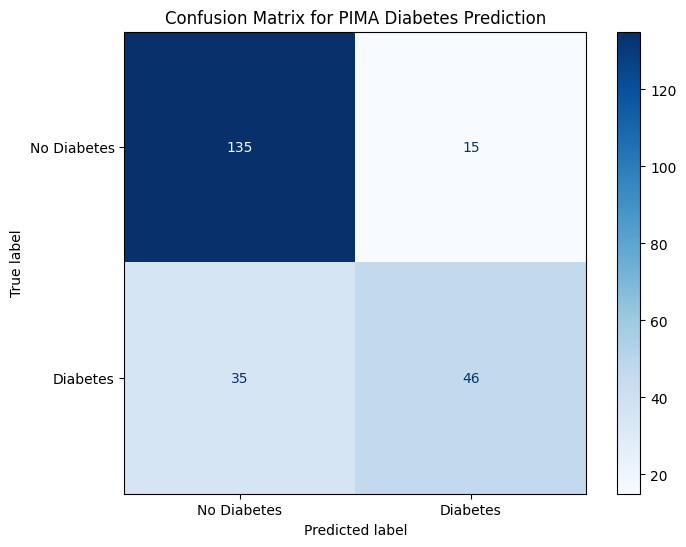

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
cm = confusion_matrix(y_test, predicted)

# The confusion matrix is a 2x2 matrix for binary classification
tn, fp, fn, tp = cm.ravel()

print("--- Confusion Matrix Details ---")
print(f"True Positives (TP): {tp} -> Correctly predicted diabetes")
print(f"True Negatives (TN): {tn} -> Correctly predicted no diabetes")
print(f"False Positives (FP): {fp} -> Incorrectly predicted diabetes (Type I Error)")
print(f"False Negatives (FN): {fn} -> Incorrectly predicted no diabetes (Type II Error)")

print("\n--- Classification Report ---")
# `classification_report` provides precision, recall, and F1-score
print(classification_report(y_test, predicted, target_names=['No Diabetes', 'Diabetes']))
print(f"Accuracy is: {model4.accuracy(y_test,predicted)}%")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for PIMA Diabetes Prediction')
plt.show()


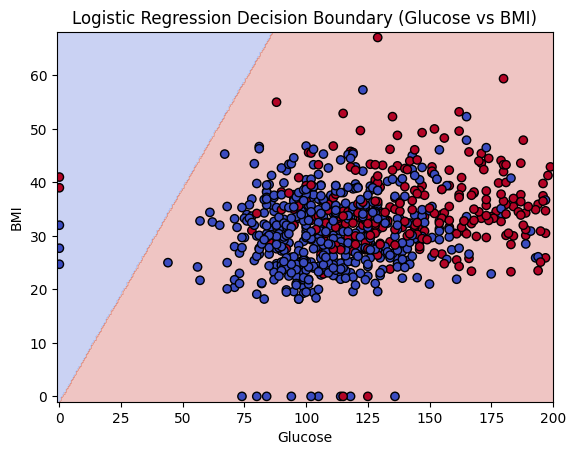

In [ ]:
X = df[['Glucose', 'BMI']].values
y = df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogReg(learning_rate=0.01,n_iters=1500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1,X[:,1].max() + 1 
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
np.linspace(y_min, y_max, 300)) 
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z =Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k", cmap=plt.cm.coolwarm)
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.title("Logistic Regression Decision Boundary (Glucose vs BMI)")
plt.show()